## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

/home/goncalo/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Get the data

In [2]:
df = pd.read_csv("../../../datasets/parte2/teste/dataset.csv")

## Feature engineering

#### Split date

In [3]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,year,month,day
0,1.672531e+09,local,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,...,3.72,100.0,moderate rain,0,0.0,0.467,0.0,2023,1,1
1,1.672535e+09,local,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,...,3.26,100.0,moderate rain,1,0.0,0.577,0.0,2023,1,1
2,1.672538e+09,local,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,...,2.44,100.0,moderate rain,2,0.0,0.346,0.0,2023,1,1
3,1.672542e+09,local,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,...,1.74,100.0,moderate rain,3,0.0,0.270,0.0,2023,1,1
4,1.672546e+09,local,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,...,1.13,100.0,moderate rain,4,0.0,0.252,0.0,2023,1,1


#### Remove city_name

In [4]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,year,month,day
0,1.672531e+09,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,0,0.0,0.467,0.0,2023,1,1
1,1.672535e+09,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,1,0.0,0.577,0.0,2023,1,1
2,1.672538e+09,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,2,0.0,0.346,0.0,2023,1,1
3,1.672542e+09,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,3,0.0,0.270,0.0,2023,1,1
4,1.672546e+09,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,4,0.0,0.252,0.0,2023,1,1


#### Remove day, month, year and hour

In [5]:
df.drop('hour', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,normal,economic_schedule,self-consumption
0,1.672531e+09,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,0.0,0.467,0.0
1,1.672535e+09,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,0.0,0.577,0.0
2,1.672538e+09,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,0.0,0.346,0.0
3,1.672542e+09,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,0.0,0.270,0.0
4,1.672546e+09,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,0.0,0.252,0.0


#### Remove dt

In [6]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,normal,economic_schedule,self-consumption
0,12.93,12.76,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,0.0,0.467,0.0
1,13.49,13.38,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,0.0,0.577,0.0
2,13.55,13.44,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,0.0,0.346,0.0
3,13.61,13.51,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,0.0,0.270,0.0
4,13.59,13.49,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,0.0,0.252,0.0


#### Remove feels_like

In [7]:
df.drop('feels_like', axis=1, inplace=True)

df.head()

,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,normal,economic_schedule,self-consumption
0,12.93,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,moderate rain,0.0,0.467,0.0
1,13.49,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,moderate rain,0.0,0.577,0.0
2,13.55,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,moderate rain,0.0,0.346,0.0
3,13.61,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,moderate rain,0.0,0.270,0.0
4,13.59,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,moderate rain,0.0,0.252,0.0


## Label enconding

In [8]:
lb_make = LabelEncoder()

df['weather_description_encoded'] = lb_make.fit_transform(df['weather_description'])
df.drop('weather_description', axis=1, inplace=True)

df.head()

,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,normal,economic_schedule,self-consumption,weather_description_encoded
0,12.93,12.72,13.43,1019.0,NaN,NaN,95.0,2.02,3.72,100.0,0.0,0.467,0.0,4
1,13.49,13.43,13.90,1018.0,NaN,NaN,95.0,2.18,3.26,100.0,0.0,0.577,0.0,4
2,13.55,13.48,14.82,1017.0,NaN,NaN,95.0,2.88,2.44,100.0,0.0,0.346,0.0,4
3,13.61,12.01,14.82,1016.0,NaN,NaN,95.0,3.63,1.74,100.0,0.0,0.270,0.0,4
4,13.59,12.01,14.82,1015.0,NaN,NaN,95.0,4.58,1.13,100.0,0.0,0.252,0.0,4


## Missing Values

In [9]:
print(df.isna().sum())
df.shape

temp                            504
temp_min                        504
temp_max                        504
pressure                        504
sea_level                      2256
grnd_level                     2256
humidity                        504
wind_speed                      504
rain_1h                        2050
clouds_all                      504
normal                            0
economic_schedule                 0
self-consumption                  0
weather_description_encoded       0
dtype: int64


(2256, 14)

#### Remove sea_level, grnd_level and rain_1h

In [10]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True)

df['temp'].fillna(df['temp'].mean(), inplace=True)

df['temp_min'].fillna(df['temp_min'].mean(), inplace=True)

df['temp_max'].fillna(df['temp_max'].mean(), inplace=True)

df['pressure'].fillna(df['pressure'].mean(), inplace=True)

df['humidity'].fillna(df['humidity'].mean(), inplace=True)

df['wind_speed'].fillna(df['wind_speed'].mean(), inplace=True)

df['clouds_all'].fillna(df['clouds_all'].mean(), inplace=True)

df.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,normal,economic_schedule,self-consumption,weather_description_encoded
0,12.93,12.72,13.43,1019.0,95.0,2.02,100.0,0.0,0.467,0.0,4
1,13.49,13.43,13.90,1018.0,95.0,2.18,100.0,0.0,0.577,0.0,4
2,13.55,13.48,14.82,1017.0,95.0,2.88,100.0,0.0,0.346,0.0,4
3,13.61,12.01,14.82,1016.0,95.0,3.63,100.0,0.0,0.270,0.0,4
4,13.59,12.01,14.82,1015.0,95.0,4.58,100.0,0.0,0.252,0.0,4


## Write new csv

In [11]:
df.to_csv('../../../datasets/parte2/teste/dataset_prepared.csv', index=False)

<Axes: >

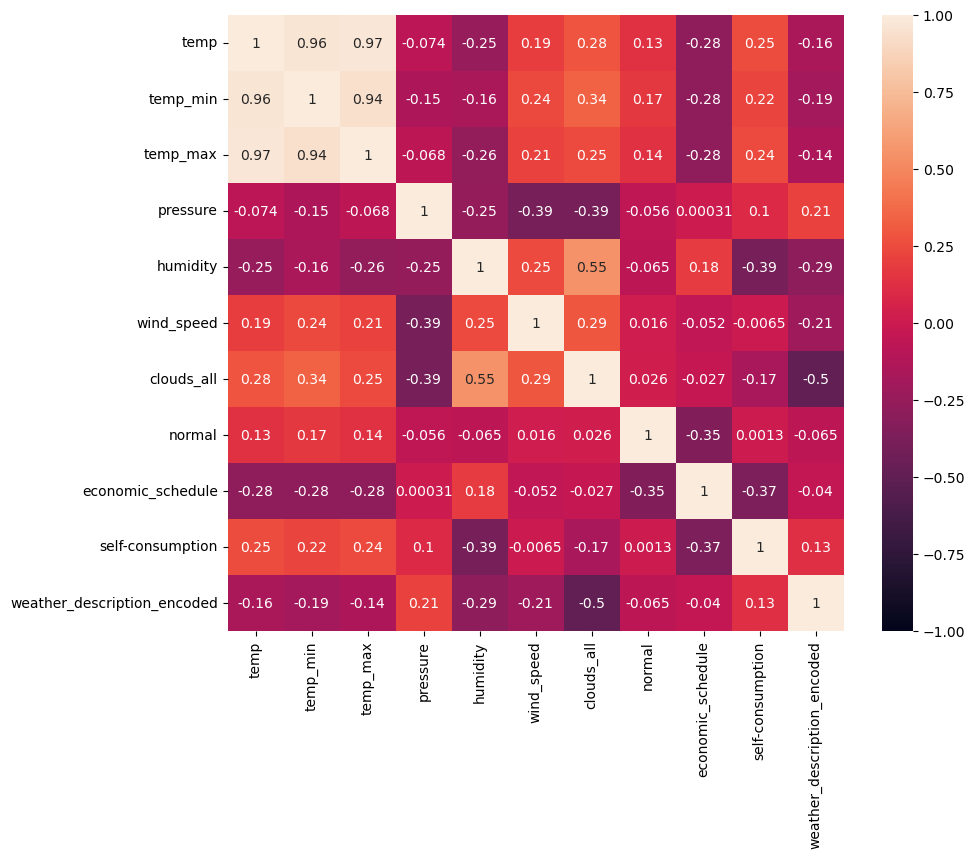

In [12]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)